In [ ]:
#B.

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

In [4]:
df = pd.read_csv("j_points.csv",delimiter=",",encoding="UTF-8")
display(df.head()) 
print(df.dtypes) 
print(df.shape)
display(df.head())

,team,cross_point,goal_point,shoot_point,dribble_point,pass_point,attack
0,横浜F・マリノス,25.45,47.98,84.18,11.70,143.10,180.25
1,浦和レッズ,22.88,23.71,77.92,11.09,112.26,146.23
2,アビスパ福岡,21.06,8.56,43.92,11.93,78.90,111.90
3,鹿島アントラーズ,18.57,35.24,74.36,15.67,106.93,141.17
4,サガン鳥栖,17.72,20.37,37.50,6.85,111.70,136.28


team              object
cross_point      float64
goal_point       float64
shoot_point      float64
dribble_point    float64
pass_point       float64
attack           float64
dtype: object
(18, 7)


,team,cross_point,goal_point,shoot_point,dribble_point,pass_point,attack
0,横浜F・マリノス,25.45,47.98,84.18,11.70,143.10,180.25
1,浦和レッズ,22.88,23.71,77.92,11.09,112.26,146.23
2,アビスパ福岡,21.06,8.56,43.92,11.93,78.90,111.90
3,鹿島アントラーズ,18.57,35.24,74.36,15.67,106.93,141.17
4,サガン鳥栖,17.72,20.37,37.50,6.85,111.70,136.28


In [5]:
df.corr()

C:\Users\honda\AppData\Local\Temp\ipykernel_2132\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,cross_point,goal_point,shoot_point,dribble_point,pass_point,attack
cross_point,1.000000,0.193953,0.533690,0.369150,0.410899,0.548823
goal_point,0.193953,1.000000,0.392526,-0.108048,0.371546,0.349707
shoot_point,0.533690,0.392526,1.000000,0.465876,0.672625,0.731567
dribble_point,0.369150,-0.108048,0.465876,1.000000,0.211906,0.352793
pass_point,0.410899,0.371546,0.672625,0.211906,1.000000,0.981824
attack,0.548823,0.349707,0.731567,0.352793,0.981824,1.000000


In [8]:
#Cell_7.
import scipy
from scipy import linalg

def cor2pcor(R):
    inv_cor = linalg.inv(R)
    rows = inv_cor.shape[0]
    regu_1 = 1 / np.sqrt(np.diag(inv_cor))
    regu_2 = np.repeat(regu_1, rows).reshape(rows, rows)
    pcor = (-inv_cor) * regu_1 * regu_2
    np.fill_diagonal(pcor, 1)
    return pcor
pcor = pd.DataFrame(cor2pcor(df.corr()), columns=df.corr().columns, index=df.corr().index)
display(pcor)

C:\Users\honda\AppData\Local\Temp\ipykernel_2132\3400778714.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pcor = pd.DataFrame(cor2pcor(df.corr()), columns=df.corr().columns, index=df.corr().index)


,cross_point,goal_point,shoot_point,dribble_point,pass_point,attack
cross_point,1.000000,-0.007854,0.315447,-0.999996,-0.999999,0.999999
goal_point,-0.007854,1.000000,0.309156,-0.008622,-0.007871,0.007902
shoot_point,0.315447,0.309156,1.000000,0.315922,0.315186,-0.315039
dribble_point,-0.999996,-0.008622,0.315922,1.000000,-0.999998,0.999998
pass_point,-0.999999,-0.007871,0.315186,-0.999998,1.000000,1.000000
attack,0.999999,0.007902,-0.315039,0.999998,1.000000,1.000000


In [ ]:
#D.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
df = pd.read_csv('cosmetics.csv', header=0,sep=',')
print(df.dtypes) 
print(df.shape)
display(df.head())

スコア     float64
ブランド     object
名称       object
量         int64
口コミ数      int64
単価        int64
注目人数      int64
所持人数      int64
dtype: object
(43, 8)


,スコア,ブランド,名称,量,口コミ数,単価,注目人数,所持人数
0,5.1,イプサ,ザ・タイムRアクア,200,5530,4000,15731,32758
1,5.3,アルビオン,フローラドリップ,80,1561,7000,5584,9737
2,5.0,エリクシール,エリクシールルフレバランシングおしろいミルクC,35,1113,1800,1754,3883
3,5.3,キュレル,ディープモイスチャースプレー,60,1110,900,1921,3622
4,5.6,エリクシール,デザインタイム美容液,40,949,4000,729,1877


In [12]:
df2=df[['量','口コミ数','単価','注目人数','所持人数','スコア']]
display(df2.head())

,量,口コミ数,単価,注目人数,所持人数,スコア
0,200,5530,4000,15731,32758,5.1
1,80,1561,7000,5584,9737,5.3
2,35,1113,1800,1754,3883,5.0
3,60,1110,900,1921,3622,5.3
4,40,949,4000,729,1877,5.6


In [13]:
#Cell_4.
display(df2.describe())

,量,口コミ数,単価,注目人数,所持人数,スコア
count,43.000000,43.00000,43.000000,43.00000,43.000000,43.00000
mean,116.372093,3634.44186,3151.046512,4588.72093,5562.186047,4.77907
std,106.643381,6243.73758,2641.120099,6402.76189,7219.755220,0.68158
min,10.000000,36.00000,325.000000,9.00000,1.000000,2.70000
25%,34.500000,391.50000,960.000000,408.50000,719.000000,4.50000
50%,90.000000,1113.00000,2500.000000,1848.00000,3622.000000,5.00000
75%,170.000000,2725.00000,4000.000000,6026.50000,7344.500000,5.25000
max,500.000000,26314.00000,11000.000000,26326.00000,32758.000000,5.60000


In [14]:
#Cell_5.
X = df2.drop(columns='スコア')  # explanatory variables,
y = df2['スコア']  # objective variable, 
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (43, 5)


,量,口コミ数,単価,注目人数,所持人数
0,200,5530,4000,15731,32758
1,80,1561,7000,5584,9737
2,35,1113,1800,1754,3883
3,60,1110,900,1921,3622
4,40,949,4000,729,1877


y: (43,)
0    5.1
1    5.3
2    5.0
3    5.3
4    5.6
Name: スコア, dtype: float64


In [15]:
#Cell_7.
X_dumm=X.copy()
X_dumm_c = sm.add_constant(X_dumm)
model = sm.OLS(y, X_dumm_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    スコア   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.176
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0778
Time:                        13:12:58   Log-Likelihood:                -38.483
No. Observations:                  43   AIC:                             88.97
Df Residuals:                      37   BIC:                             99.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7408      0.199     23.796      0.0

In [16]:
#Cell_10.
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)

R2: 0.22722144690939716
Adj R2: 0.12279191270796441


In [17]:
#Cell_11.
print(results.params)

const    4.740765
量       -0.002329
口コミ数     0.000015
単価       0.000036
注目人数    -0.000012
所持人数     0.000035
dtype: float64


In [18]:
#Cell_12.
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(y)

In [19]:
#Cell_13.
# NOTE: make DataFrames corresponding to X_scaled and y_scaled.
X_scaled = pd.DataFrame(X_scaled_ar, columns=X_dumm.columns)
y_scaled = pd.Series(y_scaled_ar, name=y.name)
model = sm.OLS(y_scaled, X_scaled)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                    スコア   R-squared (uncentered):                   0.227
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              2.235
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                      0.0706
Time:                        13:13:03   Log-Likelihood:                         -55.472
No. Observations:                  43   AIC:                                      120.9
Df Residuals:                      38   BIC:                                      129.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
#Cell_14.
print(results_scaled.params.sort_values(key=np.abs, ascending=False))

所持人数    0.372539
量      -0.364408
単価      0.140304
口コミ数    0.133658
注目人数   -0.109325
dtype: float64


In [21]:
#Cell_15.
X_test = pd.DataFrame([[150, 345, 1000, 1000,1500],
                       [250, 23, 900, 120,250],
                        ],
                        columns=X_dumm.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,量,口コミ数,単価,注目人数,所持人数
0,150,345,1000,1000,1500
1,250,23,900,120,250


In [22]:
#Cell_16.
X_test_c = sm.add_constant(X_test, has_constant = 'add')
display(X_test_c)
y_test = results.predict(X_test_c)
print('Predicted y:')
print(y_test)

,const,量,口コミ数,単価,注目人数,所持人数
0,1.0,150,345,1000,1000,1500
1,1.0,250,23,900,120,250


Predicted y:
0    4.473772
1    4.198832
dtype: float64


In [23]:
#Cell_17.
y_pred = results.predict(X_dumm_c)
print('Predicted y:')
print(y_pred.head())

Predicted y:
0    5.469487
1    5.108132
2    4.856813
3    4.754834
4    4.863810
dtype: float64


In [24]:
#Cell_18.
y_min = np.append(y_pred, y).min()
y_max = np.append(y_pred, y).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

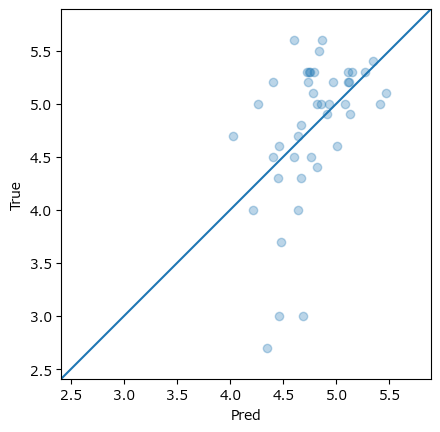

In [25]:
#Cell_19.
plt.scatter(y_pred, y, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [26]:
#Cell_20.
mse = mean_squared_error(y, y_pred)
print('MSE, RMSE:', mse, np.sqrt(mse))

MSE, RMSE: 0.3506467011746641 0.5921542883190699


In [27]:
#Cell_21.
#標準化して変数選択
d_scaled=pd.concat([X_scaled,y_scaled],axis=1)
display(d_scaled.head())

,量,口コミ数,単価,注目人数,所持人数,スコア
0,0.793463,0.307186,0.325241,1.760825,3.811441,0.476435
1,-0.345099,-0.336014,1.474566,0.157285,0.585092,0.773343
2,-0.772060,-0.408615,-0.517597,-0.447974,-0.235335,0.327980
3,-0.534860,-0.409101,-0.862394,-0.421583,-0.271913,0.773343
4,-0.724620,-0.435192,0.325241,-0.609955,-0.516472,1.218706


In [28]:
#Cell_22.
# forward method for variable selection based on AIC.
# Stepwise feature selection method (forward); 変数増加法による変数選択
def step_aic_forward(model, exog, endog, **kwargs):
    '''
    This function calculates the best subset of explanatory (exogenous) variables based on AIC.
    Both exog and endog can be either str or list.

    Arguments:
        model: model from statsmodels.formula.api
        exog (str or list): explanatory (exogenous) variables
        endog (str or list): objective (endogenous) variables
        kwargs: additional keyword argments for model (data, family, ...)

    Return values:
        model: a model with the smallest AIC
    '''
    
    # Convert exog, endog into 1-d list
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # Selected exogenous variables

    # First, calculate AIC with a constant (no exogs)
    formula_head = 'Q("' + '") + Q("'.join(endog) + '") ~ '
    formula = formula_head + '1'
    aic = model(formula=formula, **kwargs).fit().aic
    print('AIC: {:.3f}, formula: {}'.format(aic, formula))

    current_score, best_new_score = aic, aic

    # Break loop if all exogs are selected or no remaining exogs can improve AIC
    while True:
        score_with_candidates = []
        for candidate in remaining:
            # Calculate AIC for adding an exog one by one
            formula_tail = 'Q("' + '") + Q("'.join(selected + [candidate]) + '")'
            formula = formula_head + formula_tail
            aic = model(formula=formula, **kwargs).fit().aic
            print('AIC: {:.3f}, formula: {}'.format(aic, formula))

            score_with_candidates.append((aic, candidate))

        # Select best_candidate with minimum AIC
        score_with_candidates.sort()
        best_score, best_candidate = score_with_candidates[0]

        # select best_candidate if AIC is improved
        improved = False
        if best_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_score
            improved = True
            
        if not remaining or not improved: break

    formula = formula_head + 'Q("' + '") + Q("'.join(selected) + '")'
    print('The best formula: {}'.format(formula))
    aic = model(formula=formula, **kwargs).fit().aic
    print('Minimum AIC: {:.3f}'.format(aic))
    
    ret = model(formula, **kwargs).fit()
    ret.model.exog_names_org = [re.sub(r'Q\(\"(.*)\"\)',r'\1',x) for x in list(ret.model.exog_names)]
    ret.model.endog_names_org = re.sub(r'Q\(\"(.*)\"\)',r'\1',ret.model.endog_names)
    return ret

In [29]:
#Cell_23.
#変数選択を実行

header_y = y_scaled.name
header_x = X_scaled.columns
model = step_aic_forward(smf.ols, header_x,header_y, data=d_scaled)

AIC: 124.029, formula: Q("スコア") ~ 1
AIC: 122.731, formula: Q("スコア") ~ Q("所持人数")
AIC: 122.766, formula: Q("スコア") ~ Q("量")
AIC: 124.244, formula: Q("スコア") ~ Q("単価")
AIC: 125.181, formula: Q("スコア") ~ Q("口コミ数")
AIC: 124.643, formula: Q("スコア") ~ Q("注目人数")
AIC: 118.179, formula: Q("スコア") ~ Q("所持人数") + Q("量")
AIC: 123.038, formula: Q("スコア") ~ Q("所持人数") + Q("単価")
AIC: 124.691, formula: Q("スコア") ~ Q("所持人数") + Q("口コミ数")
AIC: 124.607, formula: Q("スコア") ~ Q("所持人数") + Q("注目人数")
AIC: 119.088, formula: Q("スコア") ~ Q("所持人数") + Q("量") + Q("単価")
AIC: 120.051, formula: Q("スコア") ~ Q("所持人数") + Q("量") + Q("口コミ数")
AIC: 120.122, formula: Q("スコア") ~ Q("所持人数") + Q("量") + Q("注目人数")
The best formula: Q("スコア") ~ Q("所持人数") + Q("量")
Minimum AIC: 118.179


In [30]:
#Cell_24.
#選択された説明変数のみで標準化重回帰分析
#reasonなし
X_scaled2 = X_scaled[['所持人数', '量']]

import statsmodels.api as sm
mod2 = sm.OLS(y_scaled,X_scaled2)
res2 = mod2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    スコア   R-squared (uncentered):                   0.205
Model:                            OLS   Adj. R-squared (uncentered):              0.166
Method:                 Least Squares   F-statistic:                              5.277
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                     0.00913
Time:                        13:14:28   Log-Likelihood:                         -56.089
No. Observations:                  43   AIC:                                      116.2
Df Residuals:                      41   BIC:                                      119.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
#Cell_26.
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = mod2.exog.shape[1] 
vifs = [variance_inflation_factor(mod2.exog, i)
        for i in range(0, num_cols)]
pd.DataFrame(vifs, index=mod2.exog_names, columns=["VIF"])

,VIF
所持人数,1.086724
量,1.086724


In [32]:
#Cell_27.
#標準化する前のデータフレームで重回帰分析。これが最終モデル。
X_final = X_dumm[['所持人数', '量']]

mod_final = sm.OLS(y, sm.add_constant(X_final))
res_final = mod_final.fit()
print(res_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    スコア   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.149
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0102
Time:                        13:14:31   Log-Likelihood:                -39.100
No. Observations:                  43   AIC:                             84.20
Df Residuals:                      40   BIC:                             89.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8610      0.149     32.652      0.0

In [33]:
#Cell_28.
#Variance-covariance matrix.
Sigma = np.asmatrix(X_final.cov())

In [34]:
#Cell_29.
def Mahala2(vec_x, vec_mean, mat):
    length = mat.shape[0]
    vec_x = np.array(vec_x, dtype='float64')
    vec = np.asmatrix((vec_x - vec_mean).values.reshape(length, 1))
    inv = np.linalg.inv(mat)
    mahala2 = vec.T.dot(inv.dot(vec))
    return mahala2[0, 0]

In [35]:
#Cell_30.
import scipy.stats as ss
n = len(X_final) # 標本数. Sample size.
dfm = res_final.df_model # 独立変数の数（モデルの自由度）．　Number of IVs (Model degrees of freedom). 
t_0025 = ss.t.isf(q=0.05/2, df=n-dfm-1) # 自由度 n-dfm-1のt分布の上側2.5パーセント点(= ss.t.ppf(q=0.975, df=n-dfm-1))
vec_mean = X_final.mean() # 独立変数の平均を求める　Find average of independent variables
print(vec_mean)

所持人数    5562.186047
量        116.372093
dtype: float64


In [36]:
#Cell_31.
display(X_final.head())

,所持人数,量
0,32758,200
1,9737,80
2,3883,35
3,3622,60
4,1877,40


In [37]:
#Cell_32.
#観測値に対応する従属変数の信頼区間を求める Find CI of Y on observed values
X = sm.add_constant(X_final).iloc[0,:] 
print(X)
hat_y=X.dot(res_final.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable
print(hat_y)

D2_0 = Mahala2(X_final.iloc[0,:], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Ve = res_final.scale #  残差変動の不偏分散． A scale factor for the covariance matrix.
Se_o = np.sqrt((1/n + D2_0 / (n-1)) * Ve) #観測値の場合　In case of observed value

ci_low = hat_y - t_0025 * Se_o# 下側信頼
ci_up = hat_y + t_0025 * Se_o # 上側信頼

print("理論値（theoretical value）:", hat_y)
print("理論値の信頼区間（CI of theoretical value）：({0},{1})".format(ci_low,ci_up))

const        1.0
所持人数     32758.0
量          200.0
Name: 0, dtype: float64
5.548585750586387
理論値（theoretical value）: 5.548585750586387
理論値の信頼区間（CI of theoretical value）：(4.790046690850862,6.307124810321912)


In [38]:
#Cell_33.
#予測値（未観測値に対応する従属変数）の信頼区間を求める Find prediction interval of Y on unobserved values
X_test2 = X_test[['所持人数', '量']] #未観測値の設定
display(X_test2)
X = sm.add_constant(X_test2,has_constant='add').iloc[0,:]
print(X)
hat_y=X.dot(res_final.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2(X_test2.iloc[0,:], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance
Se_p = np.sqrt((1 + 1/n + D2_0 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

pi_low = hat_y - t_0025 * Se_p# 下側信頼
pi_up = hat_y + t_0025 * Se_p # 上側信頼

print("予測値（Predicted value）:", hat_y)
print("予測値の信頼区間（CI of predicted value）：({0},{1})".format(pi_low,pi_up))

,所持人数,量
0,1500,150
1,250,250


const       1.0
所持人数     1500.0
量         150.0
Name: 0, dtype: float64
予測値（Predicted value）: 4.552951492341689
予測値の信頼区間（CI of predicted value）：(3.271329979516328,5.834573005167051)


In [59]:
df = pd.read_excel('2020_uryou_r2.xlsx', header=5)

In [62]:
display(df.head())

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2020年1月1日9時10分,0,0,0.0,0
1,2020年1月1日9時20分,0,0,0.0,0
2,2020年1月1日9時30分,0,0,0.0,0
3,2020年1月1日9時40分,0,0,0.0,0
4,2020年1月1日9時50分,0,0,0.0,0


In [63]:
df.columns=['minutes','Place-A','Place-B','Place-C','Place-D']
display(df.head())

,minutes,Place-A,Place-B,Place-C,Place-D
0,2020年1月1日9時10分,0,0,0.0,0
1,2020年1月1日9時20分,0,0,0.0,0
2,2020年1月1日9時30分,0,0,0.0,0
3,2020年1月1日9時40分,0,0,0.0,0
4,2020年1月1日9時50分,0,0,0.0,0


In [76]:
df2=df.copy()
df2['minutes']= pd.to_datetime(df2['minutes'], format="%Y年%m月%d日%H時%M分")

In [77]:
print(df2.info())
display(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   minutes  52704 non-null  datetime64[ns]
 1   Place-A  52704 non-null  int64         
 2   Place-B  52704 non-null  int64         
 3   Place-C  52661 non-null  float64       
 4   Place-D  52704 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.0 MB
None


,minutes,Place-A,Place-B,Place-C,Place-D
0,2020-01-01 09:10:00,0,0,0.0,0
1,2020-01-01 09:20:00,0,0,0.0,0
2,2020-01-01 09:30:00,0,0,0.0,0
3,2020-01-01 09:40:00,0,0,0.0,0
4,2020-01-01 09:50:00,0,0,0.0,0


In [90]:
df_ave = df2.iloc[:,1:2].copy()
df_ave.index=df2['minutes']
display(df_ave.head())

,Place-A
minutes,
2020-01-01 09:10:00,0
2020-01-01 09:20:00,0
2020-01-01 09:30:00,0
2020-01-01 09:40:00,0
2020-01-01 09:50:00,0


In [91]:
df_ave_weekly = df_ave.resample('W').mean()
display(df_ave_weekly.head())

,Place-A
minutes,
2020-01-05,0.000000
2020-01-12,0.019841
2020-01-19,0.002976
2020-01-26,0.025794
2020-02-02,0.014881


<AxesSubplot:xlabel='minutes'>

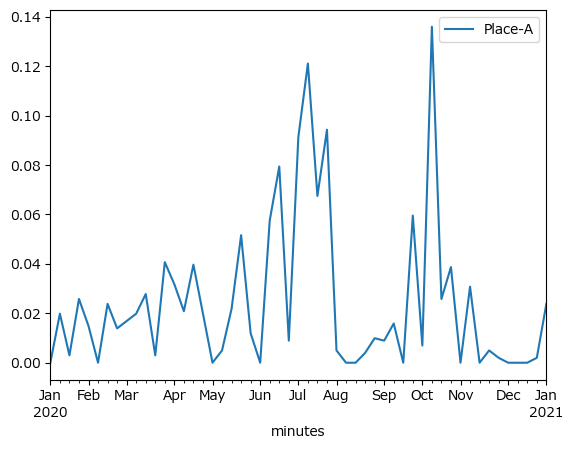

In [92]:
df_ave_weekly.plot(kind='line')

In [104]:
df_ave_weekly['minutes']=df_ave_weekly.index
df_ave_weekly['25d_mov_ave'] = df_ave_weekly['Place-A'].rolling(window=25).mean()

In [105]:
display(df_ave_weekly.head(30))

,Place-A,25d_mov_ave,minutes
minutes,,,
2020-01-05,0.000000,NaN,2020-01-05
2020-01-12,0.019841,NaN,2020-01-12
2020-01-19,0.002976,NaN,2020-01-19
2020-01-26,0.025794,NaN,2020-01-26
2020-02-02,0.014881,NaN,2020-02-02
2020-02-09,0.000000,NaN,2020-02-09
2020-02-16,0.023810,NaN,2020-02-16
2020-02-23,0.013889,NaN,2020-02-23
2020-03-01,0.016865,NaN,2020-03-01


<AxesSubplot:xlabel='minutes'>

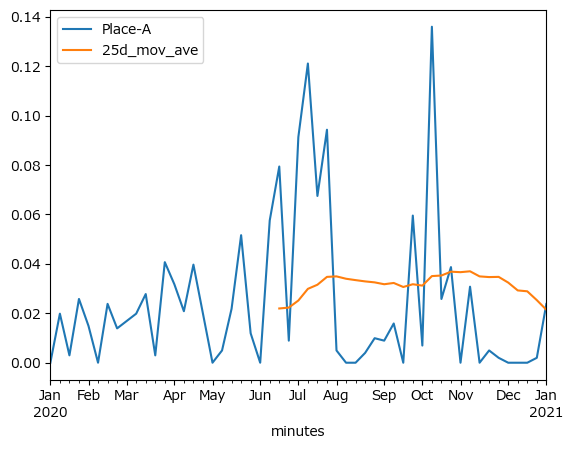

In [106]:
df_ave_weekly.plot.line('minutes',['Place-A', '25d_mov_ave'])

In [5]:
# F.

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [7]:
df = pd.DataFrame(
   [
       ['Math', 'rigorous logical idea calculation idea'],
       ['Physics', 'idea logical experimental rigorous statistics'],
       ['Psychology', 'statistics experimental data subject'],
       ['Economics', 'logical calculation data society'],
   ])
df.columns = ['category', 'text']
print(df.shape)
print(df.info())
display(df.head())

(4, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4 non-null      object
 1   text      4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes
None


,category,text
0,Math,rigorous logical idea calculation idea
1,Physics,idea logical experimental rigorous statistics
2,Psychology,statistics experimental data subject
3,Economics,logical calculation data society


In [8]:
X_train = df['text']
y_train = df['category']
print(X_train)
print(y_train)

0           rigorous logical idea calculation idea
1    idea logical experimental rigorous statistics
2             statistics experimental data subject
3                 logical calculation data society
Name: text, dtype: object
0          Math
1       Physics
2    Psychology
3     Economics
Name: category, dtype: object


In [9]:
X_test = ['logical idea data']
print(X_test)

['logical idea data']


In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
vocab = vectorizer.get_feature_names_out()
print('Vocabulary size:', len(vocab))
print(vocab)

Vocabulary size: 9
['calculation' 'data' 'experimental' 'idea' 'logical' 'rigorous' 'society'
 'statistics' 'subject']


In [11]:
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print('X_train_bow:')
print(repr(X_train_bow))
print('X_test_bow:')
print(repr(X_test_bow))

X_train_bow:
<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>
X_test_bow:
<1x9 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>


In [12]:
Xbow = pd.DataFrame(X_train_bow.toarray(), 
                    index=y_train, columns=vocab)
display(Xbow)

,calculation,data,experimental,idea,logical,rigorous,society,statistics,subject
category,,,,,,,,,
Math,1,0,0,2,1,1,0,0,0
Physics,0,0,1,1,1,1,0,1,0
Psychology,0,1,1,0,0,0,0,1,1
Economics,1,1,0,0,1,0,1,0,0


In [13]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train_bow, y_train)
print(model.classes_)
train_score = model.score(X_train_bow, y_train)
print('Train accuracy:', train_score)

['Economics' 'Math' 'Physics' 'Psychology']
Train accuracy: 1.0


In [14]:
proba = model.predict_proba(X_test_bow)
results = pd.DataFrame(proba, columns=model.classes_)
print('Prediction:')
display(results)
print(model.predict(X_test_bow))

Prediction:


,Economics,Math,Physics,Psychology
0,0.28558,0.342978,0.228652,0.14279


['Math']


In [ ]:
#G.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
csv_in = '2016-2017_NBA_stats_data.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [42]:
df = pd.read_csv(csv_in, sep=',', skiprows=27, header=0)
print(df.shape)
print(df.info())
display(df.head())

(30, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEAM    30 non-null     object 
 1   GP      30 non-null     int64  
 2   W       30 non-null     int64  
 3   L       30 non-null     int64  
 4   WIN%    30 non-null     float64
 5   MIN     30 non-null     float64
 6   PTS     30 non-null     float64
 7   FGM     30 non-null     float64
 8   FGA     30 non-null     float64
 9   FG%     30 non-null     float64
 10  3PM     30 non-null     float64
 11  3PA     30 non-null     float64
 12  3P%     30 non-null     float64
 13  FTM     30 non-null     float64
 14  FTA     30 non-null     float64
 15  FT%     30 non-null     float64
 16  OREB    30 non-null     float64
 17  DREB    30 non-null     float64
 18  REB     30 non-null     float64
 19  AST     30 non-null     float64
 20  TOV     30 non-null     float64
 21  STL     30 non-null     float64


,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Golden State Warriors,82,67,15,0.817,48.2,115.9,43.1,87.1,49.5,12.0,31.2,38.3,17.8,22.6,78.8,9.4,35.0,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6
1,San Antonio Spurs,82,61,21,0.744,48.3,105.3,39.3,83.7,46.9,9.2,23.5,39.1,17.6,22.0,79.7,10.0,33.9,43.9,23.8,13.4,8.0,5.9,4.1,18.3,19.8,7.2
2,Houston Rockets,82,55,27,0.671,48.2,115.3,40.3,87.2,46.2,14.4,40.3,35.7,20.3,26.5,76.6,10.9,33.5,44.4,25.2,15.1,8.2,4.3,5.0,19.9,20.4,5.8
3,Boston Celtics,82,53,29,0.646,48.2,108.0,38.6,85.1,45.4,12.0,33.4,35.9,18.7,23.2,80.7,9.1,32.9,42.0,25.2,13.3,7.5,4.1,5.2,20.6,20.3,2.6
4,Cleveland Cavaliers,82,51,31,0.622,48.5,110.3,39.9,84.9,47.0,13.0,33.9,38.4,17.5,23.3,74.8,9.3,34.4,43.7,22.7,13.7,6.6,4.0,4.3,18.1,20.6,3.2


In [59]:
df['over_half']=0
for i in range(df.shape[0]):
    if(df.iloc[i,2] > df.iloc[i,3]):
        df.loc[i,'over_half'] =1

display(df.head())

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,over_half
0,Golden State Warriors,82,67,15,0.817,48.2,115.9,43.1,87.1,49.5,12.0,31.2,38.3,17.8,22.6,78.8,9.4,35.0,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6,1
1,San Antonio Spurs,82,61,21,0.744,48.3,105.3,39.3,83.7,46.9,9.2,23.5,39.1,17.6,22.0,79.7,10.0,33.9,43.9,23.8,13.4,8.0,5.9,4.1,18.3,19.8,7.2,1
2,Houston Rockets,82,55,27,0.671,48.2,115.3,40.3,87.2,46.2,14.4,40.3,35.7,20.3,26.5,76.6,10.9,33.5,44.4,25.2,15.1,8.2,4.3,5.0,19.9,20.4,5.8,1
3,Boston Celtics,82,53,29,0.646,48.2,108.0,38.6,85.1,45.4,12.0,33.4,35.9,18.7,23.2,80.7,9.1,32.9,42.0,25.2,13.3,7.5,4.1,5.2,20.6,20.3,2.6,1
4,Cleveland Cavaliers,82,51,31,0.622,48.5,110.3,39.9,84.9,47.0,13.0,33.9,38.4,17.5,23.3,74.8,9.3,34.4,43.7,22.7,13.7,6.6,4.0,4.3,18.1,20.6,3.2,1


In [63]:
print(df.columns)

Index(['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', ' +/-', 'over_half'],
      dtype='object')


In [65]:
dfX = df.loc[:, 'GP':' +/-']
display(dfX.head())

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,82,67,15,0.817,48.2,115.9,43.1,87.1,49.5,12.0,31.2,38.3,17.8,22.6,78.8,9.4,35.0,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6
1,82,61,21,0.744,48.3,105.3,39.3,83.7,46.9,9.2,23.5,39.1,17.6,22.0,79.7,10.0,33.9,43.9,23.8,13.4,8.0,5.9,4.1,18.3,19.8,7.2
2,82,55,27,0.671,48.2,115.3,40.3,87.2,46.2,14.4,40.3,35.7,20.3,26.5,76.6,10.9,33.5,44.4,25.2,15.1,8.2,4.3,5.0,19.9,20.4,5.8
3,82,53,29,0.646,48.2,108.0,38.6,85.1,45.4,12.0,33.4,35.9,18.7,23.2,80.7,9.1,32.9,42.0,25.2,13.3,7.5,4.1,5.2,20.6,20.3,2.6
4,82,51,31,0.622,48.5,110.3,39.9,84.9,47.0,13.0,33.9,38.4,17.5,23.3,74.8,9.3,34.4,43.7,22.7,13.7,6.6,4.0,4.3,18.1,20.6,3.2


In [66]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

In [67]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [68]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.29026037 0.17202726 0.12054088 0.08808959 0.0724732  0.05152875
 0.0457488 ]
[0.29026037 0.46228764 0.58282852 0.67091811 0.74339131 0.79492006
 0.84066886]


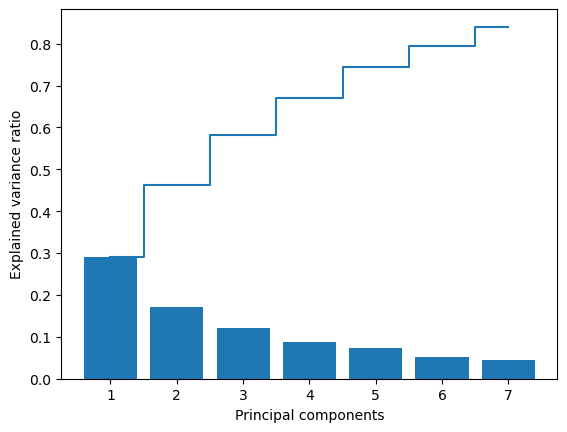

In [69]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [70]:
ser_class = df['over_half']
print(ser_class.value_counts())

0    16
1    14
Name: over_half, dtype: int64


In [71]:
classes = ser_class.unique()
print(classes)
colors = ['blue', 'red']

[1 0]


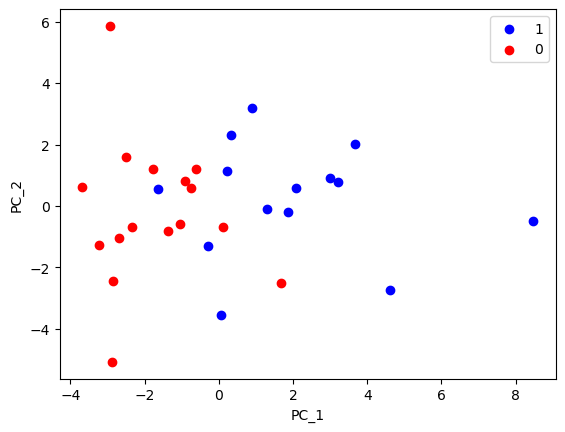

In [72]:
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 1]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

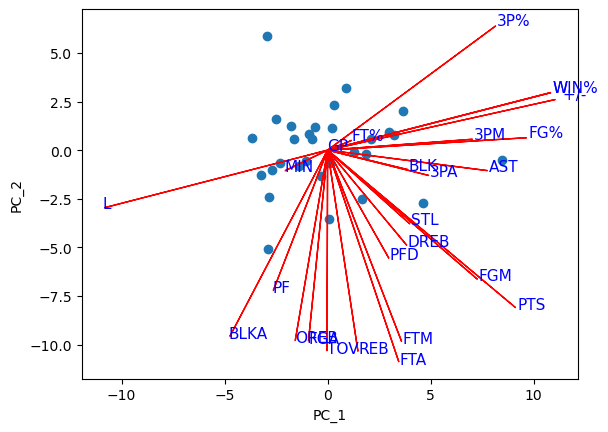

In [73]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 32
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)